Elizabeth Qiu - Analysis on "Am I the Asshole?" Reddit posts

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# import libraries
import pandas as pd
import numpy as np
import scipy as sp

import spacy
from collections import Counter

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [37]:
max_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/hw4_max.csv")
fardina_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/hw4_fardina.csv")

aita_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/hw4_aita.csv") # external dataset,
# 30K+ responses (age,gender,aita -> can find avg age, assuming gender 0=male?, not the a-hole / everyone sucks / no a-holes here / asshole)

## Part 0: Data Cleaning

#### For your information

The large wall of text you're about to see are the questions that were the columns of the datasets. I will rename the columns of scenarios, from long questions to "s*n*", where *n* is the *n*th scenario. This made my analysis easier, instead of addressing columns by their long string of text. Some of the columns are entire paragraphs, so to go about manipulating them, I will rename the columns “or else your life will be a nightmare!” (– Max on Piazza)

The **bolded** parts are personal notes. I realize that there are a lot of AITA questions related to finances. I have also loaded these strings (removing the "Am I an asshole?" part) into another text file, because later on I will use spaCy, an NLP library, to extract the most common words in these AITA descriptions.

**s1**
My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?

**s2**
My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?

**s3**
I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?

**s4**
My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.

**s5**
I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?

**s6**
My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?

**s7**
My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight. She calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up. When I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?

**s8**
I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?

**s9**
I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?

**s10**
One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?

**s11**
I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?

**s12**
Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?

**s13**
My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?

**s14**
My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?

### Now onto the dataset

The parameters are: time, year, age, adult_politics, politics, religion, gender, compassionate (optional -- only in Fardina's dataset), s1, s2, s3, ..., s13, s14


| Variable          |Definition | Key   |
| :---------------- | :------:  | ----: |
| time              |  Time submitted   | Time will vary       |
| year              |  Year in school   | 4 options            |
| age               |  Age in years     | Ranges from 17-25    |
| adult_politics    |  Responders' parents' political views    | 5 options  |
| politics          |  Responders' personal political views    | 5 options  |
| religion          |  Responders' personal spiritual views    | 3 options  |
| gender            |  Gender                                  | M/F/NB/X   |
| compassionate     |  Responder thinks they are compassionate | Binary Y/N |
| s1                |  Scenario 1       | girlfriend's knee pain        |
| s2                |  Scenario 2       | biological daughter's wedding |
| s3                |  Scenario 3       | trust fund boy and poor gf finances |
| s4                |  Scenario 4       | financing childrens' private school |
| s5                |  Scenario 5       | returning lost cat to petty owners  |
| s6                |  Scenario 6       | caring for uncalled for child house |
| s7                |  Scenario 7       | caring for uncalled for child plane |
| s8                |  Scenario 8       | splitting unfair child support alone|
| s9                |  Scenario 9       | financing child support with ex     |
| s10               |  Scenario 10      | financing expensive college majors  |
| s11               |  Scenario 11      | suing and uninviting kin to weddings|
| s12               |  Scenario 12      | lgbtq+ disagreement and donation    |
| s13               |  Scenario 13      | man's lifestyle amidst pregnant wife|
| s14               |  Scenario 14      | dyed hair not matching wedding pics |

(3 options: Not a jerk, Mildly a jerk, Strongly a jerk)
Personal Note: Here, the default "middle" is to judge the OP as "Mildly a jerk". If I were to change this, it would be less biased with another option as "Mildly not a jerk", so that there are 4 options.

In [38]:
# Cleaning: renaming columns

cols_f = ['time', 'year', 'age','adult_politics', 'politics', 'religion', 'gender', 'compassionate',
          's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14']
cols_m = ['time', 'year', 'age','adult_politics', 'politics', 'religion', 'gender',
          's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14']

fardina_data.columns = cols_f
max_data.columns = cols_m

In [39]:
# see new column names

fardina_data.info()
max_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            140 non-null    object 
 1   year            137 non-null    object 
 2   age             137 non-null    float64
 3   adult_politics  137 non-null    object 
 4   politics        137 non-null    object 
 5   religion        137 non-null    object 
 6   gender          137 non-null    object 
 7   compassionate   137 non-null    object 
 8   s1              137 non-null    object 
 9   s2              137 non-null    object 
 10  s3              136 non-null    object 
 11  s4              136 non-null    object 
 12  s5              136 non-null    object 
 13  s6              136 non-null    object 
 14  s7              135 non-null    object 
 15  s8              134 non-null    object 
 16  s9              133 non-null    object 
 17  s10             135 non-null    obj

In [40]:
# Cleaning: renaming responses of "Famale" to "Female" ('gender' column), "sophmore" to "sophomore" ('year' column), taking out incomplete rows

fardina_data['gender'] = fardina_data['gender'].replace({'Famale': 'Female'})
max_data['gender'] = max_data['gender'].replace({'Famale': 'Female'})
fardina_data['year'] = fardina_data['year'].replace({'Sophmore': 'Sophomore'})
max_data['year'] = max_data['year'].replace({'Sophmore': 'Sophomore'})

# Remove rows with any missing values
fardina_data = fardina_data.dropna()
max_data = max_data.dropna()

# Now if we were to print more data, we have clean data that is all filled up!
fardina_data.head(20)

,time,year,age,adult_politics,politics,religion,gender,compassionate,s1,s2,...,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14
0,9/23/2023 18:01,Junior,20.0,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01,Junior,20.0,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08,Junior,20.0,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09,Senior,22.0,Mildly liberal,Mildly liberal,Not spiritual at all,Female,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
5,9/23/2023 18:10,Other,25.0,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
7,9/23/2023 18:36,Junior,20.0,Mildly conservative,Neutral,Strongly spiritual,Male,No,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk
8,9/23/2023 18:53,Junior,20.0,Strongly liberal,Strongly liberal,Somewhat spiritual,Male,Yes,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
9,9/23/2023 19:08,Sophomore,19.0,Neutral,Mildly liberal,Not spiritual at all,Male,No,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
10,9/23/2023 19:24,Junior,20.0,Mildly conservative,Neutral,Not spiritual at all,Female,Yes,Mildly a jerk,Strongly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
11,9/23/2023 19:36,Junior,21.0,Neutral,Mildly liberal,Strongly spiritual,Male,Yes,Not a jerk,Strongly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk


...And now we can merge datasets for future use (df)! This, along with fardina_data and max_data, can be used for our analysis in Questions 1-3.

In [41]:
# Change all categorical data to numerical data for better analysis

# First, define new numerical values based off of user response
year_0 = {
    "Freshman": 1,
    "Sophomore": 2,
    "Junior": 3,
    "Senior": 4,
    "Other": 5
    }

adult_politics_0 = {
    "Strongly conservative": -2,
    "Mildly conservative": -1,
    "Neutral": 0,
    "Don't know / It's complicated": 0,
    "Mildly liberal": 1,
    "Strongly liberal": 2
    }

politics_0 = {
    "Strongly conservative": -2,
    "Mildly conservative": -1,
    "Neutral": 0,
    "Don't know / It's complicated": 0,
    "Mildly liberal": 1,
    "Strongly liberal": 2
    }

religion_0 = {
    "Not spiritual at all": 0,
    "Somewhat spiritual": 1,
    "Strongly spiritual": 2
    }

gender_0 = {
    "Female": -1,
    "Non-binary / other": 0,
    "Prefer not to say": 0,
    "Male": 1
    }

compassionate_0 = {
    "Yes": 1,
    "No": -1,
    np.nan: 0
    }

jerk = {
    "Not a jerk": 0,
    "Mildly a jerk": 1,
    "Strongly a jerk": 2
    }

# Merge datasets, as requested
df = pd.concat([fardina_data, max_data])

# Change the categorical data
df['year'].replace(year_0, inplace=True)
df['adult_politics'].replace(adult_politics_0, inplace=True)
df['politics'].replace(politics_0, inplace=True)
df['religion'].replace(religion_0, inplace=True)
df['gender'].replace(gender_0, inplace=True)
df['compassionate'].replace(compassionate_0, inplace=True)
for i in range(1, 15):
  scenario = f"s{i}"
  df[scenario].replace(jerk, inplace=True)

# Behold! The new dataset!
df.head()

,time,year,age,adult_politics,politics,religion,gender,compassionate,s1,s2,...,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14
0,9/23/2023 18:01,3,20.0,-1,-1,0,1,1.0,2,1,...,1,1,1,0,0,2,0,0,2,1
1,9/23/2023 18:01,3,20.0,1,1,0,1,1.0,1,1,...,1,0,2,0,0,1,0,0,2,0
2,9/23/2023 18:08,3,20.0,-1,-1,1,1,1.0,0,0,...,0,1,1,1,0,0,0,1,2,2
3,9/23/2023 18:09,4,22.0,1,1,0,-1,1.0,1,0,...,0,0,1,0,0,2,0,0,0,1
5,9/23/2023 18:10,5,25.0,-1,-1,0,1,1.0,1,0,...,0,0,0,0,2,2,0,1,0,1


## Question 1: Who's the biggest jerk? (spoiler: rich trust fund boyfriend)



**Which Reddit posts received the biggest judgments of being a midly and strongly a jerk, regardless of a student's background?**

This question was of interest to me because I was curious if there was something all of the respondents agreed upon the most. In a world full of disagreements, I hope we could at least agree upon some jerk moves. I investigated it by visualizing separate value counts of each scenario into a pie chart, where 0 = not a jerk, 1 = mildly a jerk, and 2 = strongly a jerk. It seems like scenarios 3, 5, 7, and 10 have the biggest agreements upon people being jerks. These are the ones where the rich trust fund boy made his poor girlfriend split 50/50 between finances, even when he was way better off and she had to barely make ends meet. Another scenario agreed upon where we deemed the OP a jerk was where they were returning a lost cat to petty owners and making them pay a fee, abandoning a nephew on a plane, and a parent refusing to financing a child's college tuition due to its major not making enough money. I found these pretty interesting, because besides the rich trust fund boy, I didn't think any of these scenarios should have been deemed "the biggest jerk". But this data definitely surprised me because I got to thinking that maybe our CS class is full of really sympathetic people - maybe we just don't show it as much on a day to day basis since we are busy struggling in our coursework :).

Below is my visualization.

<Axes: ylabel='Frequency'>

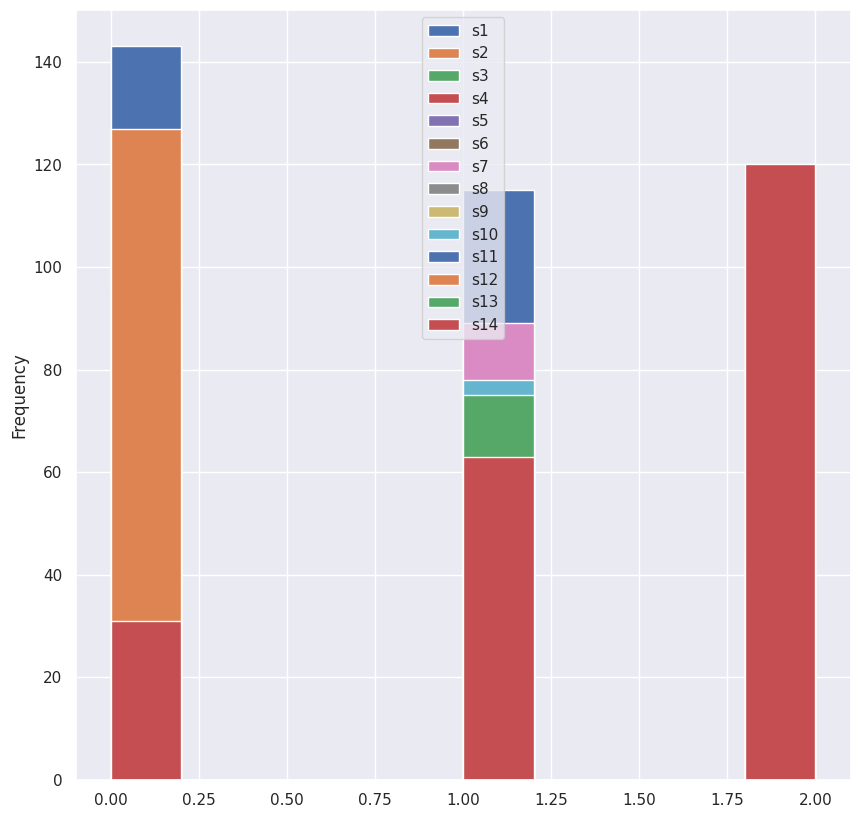

In [ ]:
 questions = cols_f[8:]
 df[questions].plot.hist(figsize=(10,10),layout=(3,4))

In [43]:
# # This was not working but I'm going to leave it here because why not

# # count the frequencies of unique judgements from the index of the frequency count
# # later used as the labels for the pie chart slices
# # x = df[questions].value_counts()
# # labels = df[questions].value_counts().index

# combined = df[questions[8]]

# for i in range(1, len(questions)):
#     combined = pd.concat([combined, df[questions[i]]], ignore_index=True)

# value_counts = combined.value_counts()

# # define Seaborn color palette to use
# colors = sns.color_palette('bright')[0:3]

# # create pie chart
# plt.pie(combined, labels = labels, colors = colors, autopct='%.0f%%')
# # plt.pie(judgement_counts, labels = judgement_counts.index, colors = colors, autopct='%.0f%%')
# plt.title('Pie Chart for the Amount of Jerks', fontsize=16)

# # Each slice of the pie represents a judgement (of the level of a jerk), and the size of each slice corresponds to the
# # percentage belonging to that judgement in the dataset.
# plt.show()

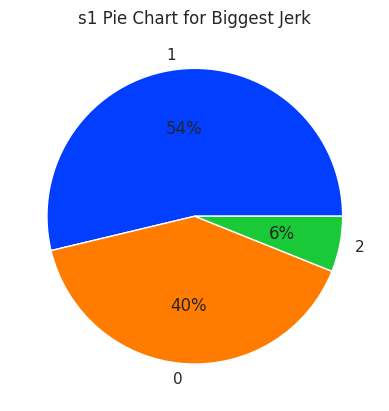

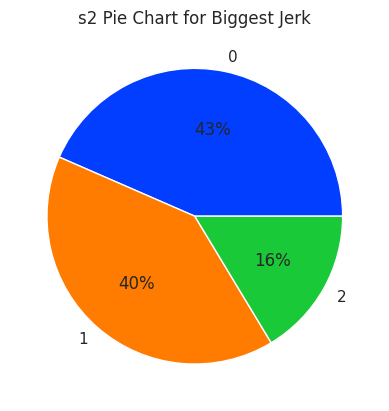

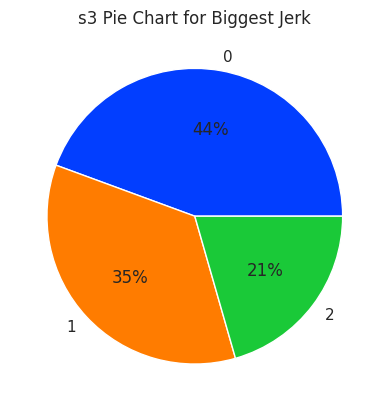

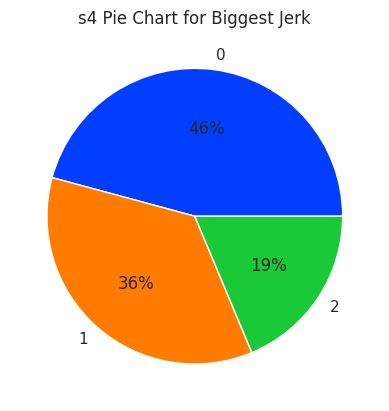

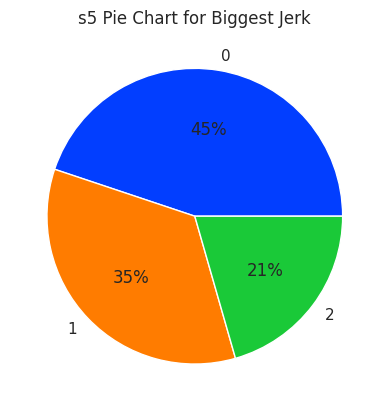

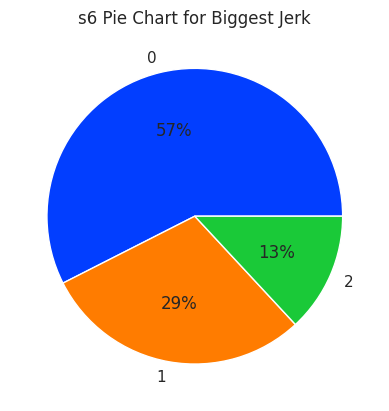

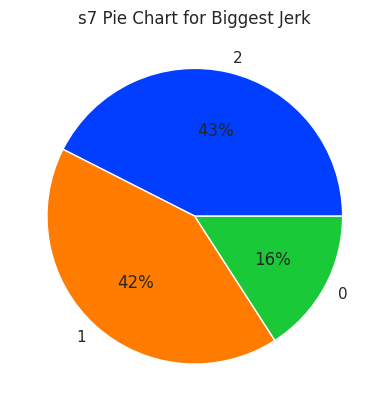

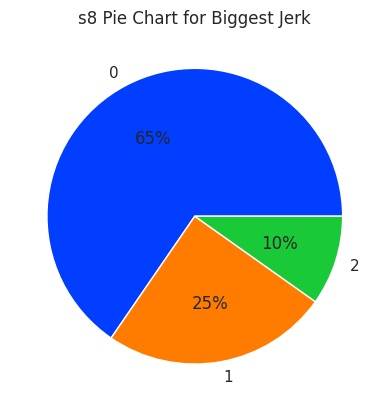

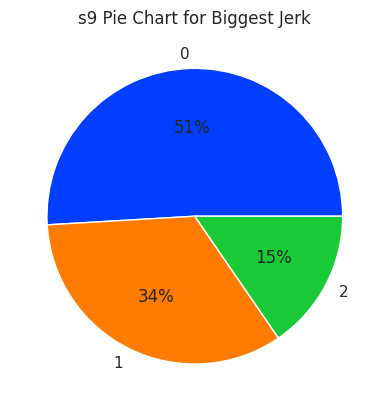

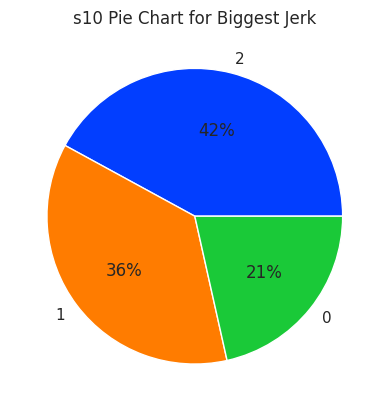

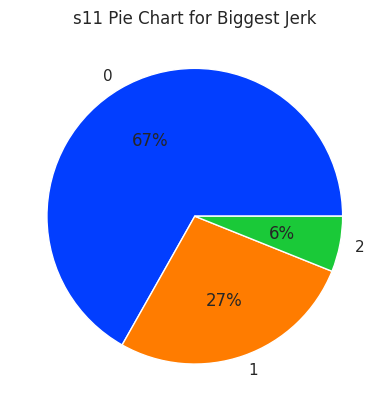

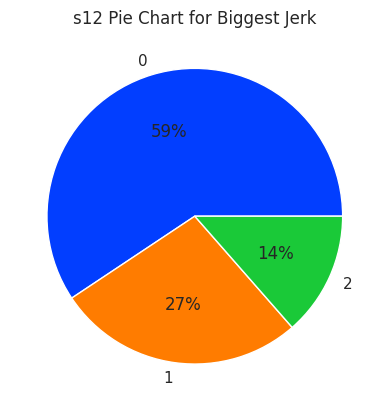

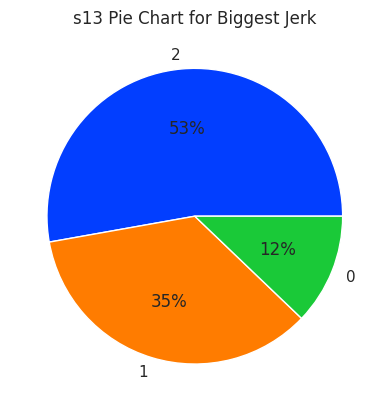

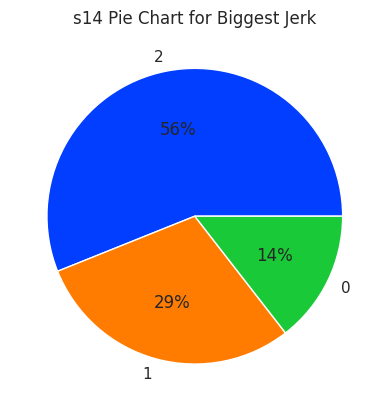

In [44]:
# Who is deemed the biggest asshole? Who is not?

# Define data
for i in range(1, 15):
  # calculates the frequency (count - how many times each season appears in the data) of each unique season in the 'Season' column It counts how many times each season appears in the data.
  x = df[f"s{i}"].value_counts()
  # extracts the unique season names (labels) from the index of the frequency count; later used as the labels for the pie chart slices.
  labels = df[f"s{i}"].value_counts().index

  # Define Seaborn color palette to use
  colors = sns.color_palette('bright')[0:3]

  # Create pie chart
  plt.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
  plt.title(f"s{i} Pie Chart for Biggest Jerk", fontsize=12)

  # Each slice of the pie represents a season, and the size of each slice corresponds to the
  # percentage of vegetables belonging to that season in the dataset.
  plt.show()

## Question 2: Is there a correlation between respondents and their judgements?

**For the dataset with the "how compassionate do you think you are?" column: are students who rate themselves as more compassionate more or less likely to judge someone as a jerk? And demographic details/factors influence judgments on the Reddit posts?**

This question was of interest to me because now I'm interested in who else thinks the dude is a jerk. Particularly, do women think the dude is a bigger jerk than the men? Also, what correlations, if any, are there of a respondent's background vs their stances in judgement? But here, I'll use the kindness priming. I enjoyed see kindness priming -- in psychology, it is a specific form of priming that occurs when a subject experiences an act of kindness and subsequently experiences a lower threshold of activation when encountering positive stimuli. Did that mean that those who were asked if they were compassionate later judged people as bigger jerks? I was curious to know all of this, and so I investigated by creating histograms and heatmaps using seaborn and matplotlib. For the first graph, I tested it out on the scenario from Question 1, where most people agreed that they OP was a jerk. For the second one, I tested it on all data points. In my result, I found out that yes, it seems like people who thought they were compassionate (or answered the question), ultimately came out to be more judgemental of the jerks (I guess, as they should!). And the heatmap was pretty cool too -- I see that religion and politics had pretty strong correlations in answers. I think this is because peoples' backgrounds and beliefs can very much determine their outlook and judgements over certain scenarios, whether they are aware of it or not.

Below are my visualizations. Keep scrolling for a bonus in Question 2.5!

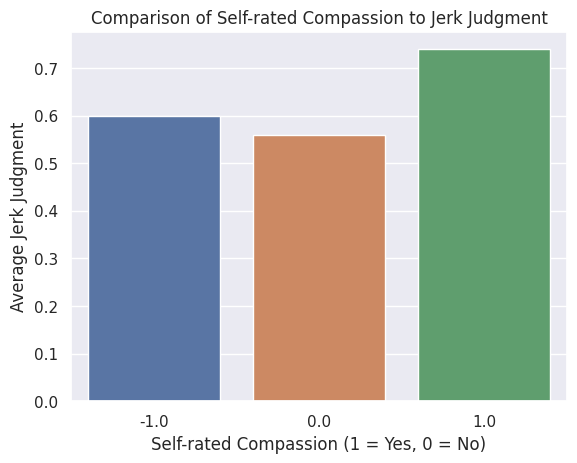

In [47]:
# To analyze the relationship between self-rated compassion and the likelihood of judging someone as a jerk

# Convert the "yes"/"no" answers to binary numerical data
df['compassionate'].map({'yes': 1, 'no': 0})

# Group by the compassion ratings and calculate the mean jerk judgment
grouped_data = df.groupby('compassionate')['s1'].mean().reset_index()

# Visualize the results
sns.barplot(x='compassionate', y='s1', data=grouped_data)
plt.xlabel('Self-rated Compassion (1 = Yes, 0 = No)')
plt.ylabel('Average Jerk Judgment')
plt.title('Comparison of Self-rated Compassion to Jerk Judgment')
plt.show()

<ipython-input-27-5d020a3f1b8c>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_data.corr()


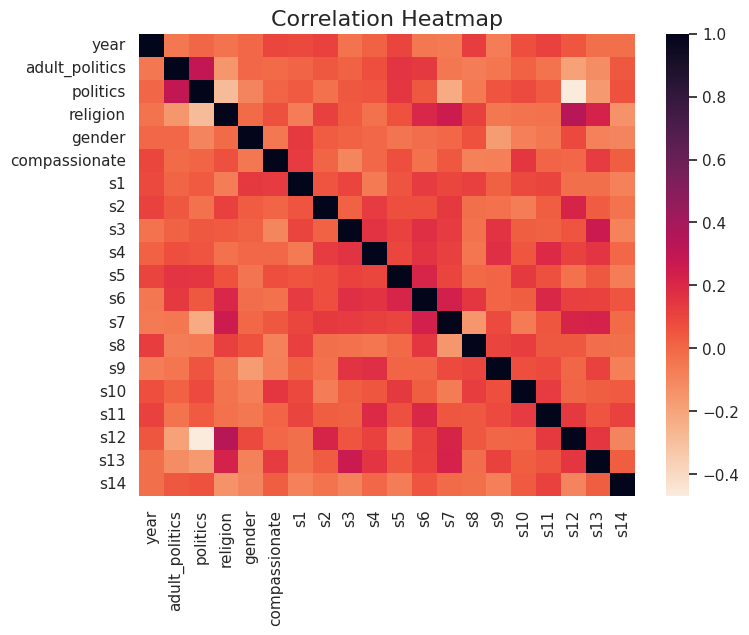

In [ ]:
# darker colors = positive correlation
# red/orange = no correlation
# lighter red/orange = mildly negative correlation

# Select numerical columns for correlation analysis
numerical_data = df[['time', 'year', 'age','adult_politics', 'politics', 'religion', 'gender', 'compassionate',
                     's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="rocket_r") # annot=True: display the correlation value.
plt.title('Correlation Heatmap', fontsize=16)

# displaying heatmap
#  visualize any correlation that may exist between the weight and price of the vegetables
plt.show()

## Question 2.5: bonus words 🤠

**Which are the most common words in the Reddit posts?**

This question was of interest to me because I was curious if there was a trend amongst the "Am I a jerk?" questions. I wanted to know what common issues people were experiencing, or what subjects they talked about often. Originally, I thought that the issues would mainly stem from money, but much to my surprise (but now it makes more sense), that many of the posters are men. They mention lots of issues they have with what they said or thought they said, with issues in communication (or lack thereof). I think most of the OPs are straight men, since they mention their girlfriend, ex-wife, daughter, wife, etc. And yeah, I guess a lot of the issues still mentioned money and finances.

Also, I created my own additional dataset for this!

Below is my work.

In [52]:
# I made a dataset of AITA descriptions that were given!
# I use this to find the most common words in a text file using the spaCy library

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Read text file
with open('/content/drive/MyDrive/Colab Notebooks/Data/hw4_aita_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Process text
doc = nlp(text)

# Filter out punctuation and stop words, then count the words
words = [token.text for token in doc if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
common_words = word_freq.most_common()

# Print the most common words
for word in common_words:
  if word[0] == '\n\n':
    continue
  if word[1] == 1:
    break
  print(word)

('told', 16)
('child', 9)
('said', 8)
('daughter', 6)
('school', 6)
('sister', 6)
('support', 6)
('like', 5)
('money', 5)
('wife', 5)
('pay', 4)
('year', 4)
('paying', 4)
('cat', 4)
('flight', 4)
('wedding', 4)
('day', 3)
('parents', 3)
('family', 3)
('expenses', 3)
('son', 3)
('reward', 3)
('called', 3)
('old', 3)
('mom', 3)
('kids', 3)
('children', 3)
('got', 3)
('mother', 3)
('decided', 3)
('girlfriend', 2)
('constantly', 2)
('taking', 2)
('fine', 2)
('years', 2)
('Recently', 2)
('asked', 2)
('practically', 2)
('fund', 2)
('split', 2)
('things', 2)
('50', 2)
('found', 2)
('send', 2)
('month', 2)
('freaked', 2)
('fair', 2)
('cover', 2)
('private', 2)
('currently', 2)
('goes', 2)
('says', 2)
('saw', 2)
('eat', 2)
('Later', 2)
('come', 2)
('work', 2)
('recently', 2)
('raise', 2)
('court', 2)
('wants', 2)
('expensive', 2)
('organization', 2)
('trip', 2)


## Question 3 (with Hypothesis Testing with Two Catagorical Variables!)

**What kind of correlation, if any, are there with respondents' parent's political views vs their own? Are there any other trends?**

This question was of interest to me because I was pretty sure that if someone grew up in an environment with people that thought a certain way, then of course they would have some influence to follow in their direction. So if someone grew up with adults super liberal, maybe they'd be super liberal as well. I investigated it by performing a chi-squared test using Numpy and Scipy. The resulting data says that yes, there is a correlation, which was what I expected. However, another trend that showed up was how respondents tend to be slightly more liberal than their parents, regardless. Then there are a few rebels here and there... maybe they grew up in a super politics-obsessed environment, and made up their own mind -- either by apathy or pure disagreement -- to go have opposite views from their parents.

We will use $\alpha = 0.01$ for our statistical tests. Essentially, this is the threshold that we compare to the calculated p-value in order to determine statistical significance.

Below is my work.

### Parents' vs Respondents' political views

In [48]:
# Code to create contigency table is provided below

pd.crosstab(df["adult_politics"], df["politics"])
# .apply(lambda x: "Not a Jerk" if x == 0 else "Jerk"))

politics,-2,-1,0,1,2
adult_politics,,,,,
-2,3,4,2,5,4
-1,1,13,21,19,9
0,1,4,24,20,6
1,2,4,7,33,18
2,1,0,1,4,8


#### Null and Alternate Hypothesis

$N_0 =$ `adult_politics` and `politics` are independent variables

$N_A =$ There's a significant association between `adult_politics` and `politics`

#### Perform Appropriate Hypothesis Test and Calculate P-Value

In [51]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

observed = ([[3, 4, 2, 5, 4],
             [1, 13, 21, 19, 9],
             [1, 4, 24, 20, 6],
             [2, 4, 7, 33, 18],
             [1, 0, 1, 4, 8]])

p = (sp.stats.chi2_contingency(observed)).pvalue
print(f"The p value was {p}")

alpha = 0.01
if p <= alpha:
  print("Reject the null hypothesis, there is a statistically significant relationship between `adult_politics` and `politics`.")
else:
  print("Fail to reject the null hypothesis, there is not a statistically significant relationship between `adult_politics` and `politics`.")

The p value was 2.0563459418194504e-06
Reject the null hypothesis, there is a statistically significant relationship between `adult_politics` and `politics`.


#### Interpreting our results

The p-value was way smaller than our alpha value of 0.01. Therefore, we reject the null hypothesis. That means that we have statistically significant evidence that there is a relationship between the political views of respondents' parents and the political views of the respondents themselves. They are more likely to adopt their parents' views similar or not too far from them.